In [1]:
# Get the MNISt dataset
!wget https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
!tar xzf mnist.tgz

--2024-10-16 21:53:13--  https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz [following]
--2024-10-16 21:53:13--  https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18294568 (17M) [application/octet-stream]
Saving to: ‘mnist.tgz’

mnist.tgz           100%[===================>]  17.45M  42.4MB/s    in 0.4s    

2024-10-16 21:53:15 (42.4 MB/s) - ‘mnist.tgz’ saved [18294568/18294568]



In [2]:
import os
import math
import numpy as np
from PIL import Image
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

image_path = 'mnist/training/0/1.png'
image = Image.open(image_path)
image

In [3]:
# Transform image pixel (0-255) to tensor (0-1)
transform = transforms.Compose([transforms.ToTensor()])
tensor_image = transform(image).squeeze(0)
print(tensor_image.shape)
tensor_image

torch.Size([28, 28])


tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

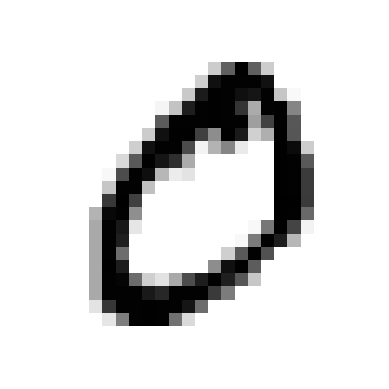

In [4]:
# Show the tensor using matplotlib
def imshow(tensor_image):
  if tensor_image.shape[0] == 784:
    tensor_image = tensor_image.reshape(28, 28)
  plt.imshow(tensor_image, cmap='gray')
  plt.axis('off')
  plt.show()

imshow(tensor_image)

In [5]:
# Lets create architecture
class MNISTNet(nn.Module):
  def __init__(self):
    super(MNISTNet, self).__init__()
    self.Layer1 = nn.Linear(784, 100)
    self.Layer2 = nn.Linear(100, 150)
    self.Layer3 = nn.Linear(150, 10)

  def forward(self, x):
    x = F.relu(self.Layer1(x))
    x = F.relu(self.Layer2(x))
    x = self.Layer3(x)
    return x

## Pytorch Dataset

The Dataset class in PyTorch provides a consistent interface to access our data. It allows us to represent our data in a structured manner and define the methods to access it. Using Dataset makes our code cleaner and ensures we have a consistent way to handle various data sources. It also helps with data transformations and preprocessing, ensuring our data is always in the right format for our model.

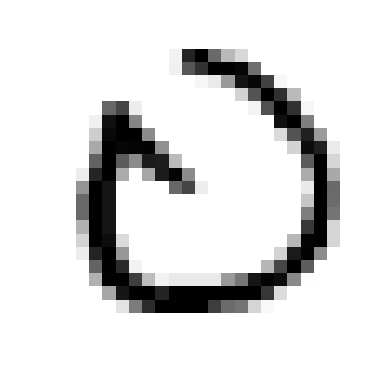

0


In [6]:
from torch.utils.data import DataLoader, Dataset

class MNISTDataset(Dataset):
  def __init__(self, root_dir):
    self.root_dir = root_dir
    self.samples = []
    self.classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]) # list of classes since folder structure was mnist/training -> [0 ->[samples], 1->[]....]

    for class_idx, class_name in enumerate(self.classes):
      class_dir = os.path.join(root_dir, class_name)
      for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        self.samples.append((image_path, class_idx)) # tuple of image path and associated class index

  def __len__(self):
    return len(self.samples)

  def __getitem__(self, idx):
    img_path, label = self.samples[idx]
    image = Image.open(img_path)
    tensor_image = transform(image).squeeze(0).reshape(28*28)
    return tensor_image, label

train_dataset = MNISTDataset(root_dir = 'mnist/training')

for image, label in train_dataset:
  imshow(image)
  print(label)
  break

## One-Hot Encoding of Labels

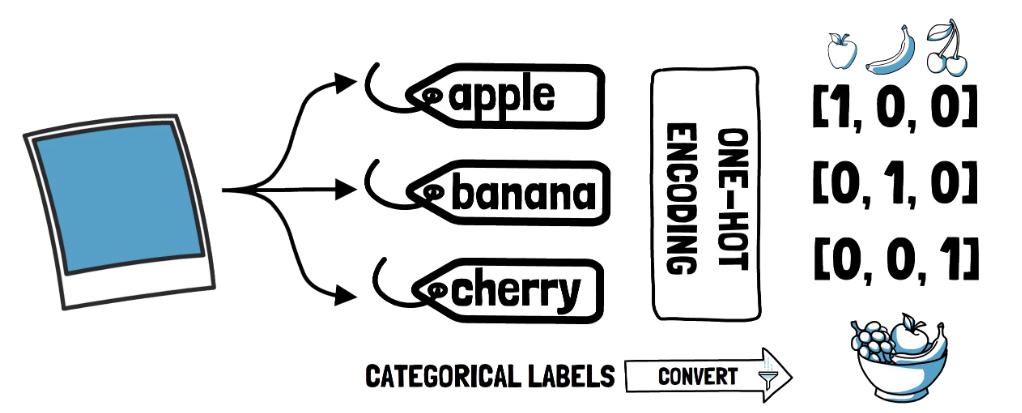

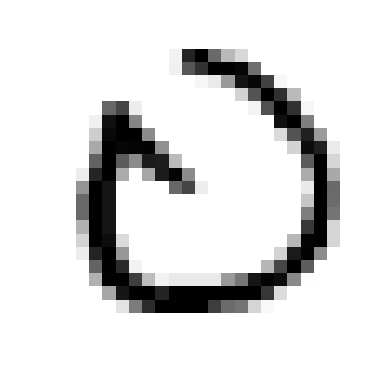

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [7]:
from torch.utils.data import DataLoader, Dataset

class MNISTDataset(Dataset):
  def __init__(self, root_dir):
    self.root_dir = root_dir
    self.samples = []
    self.classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]) # list of classes since folder structure was mnist/training -> [0 ->[samples], 1->[]....]

    for class_idx, class_name in enumerate(self.classes):
      class_dir = os.path.join(root_dir, class_name)
      for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        self.samples.append((image_path, class_idx)) # tuple of image path and associated class index

  def __len__(self):
    return len(self.samples)

  def __getitem__(self, idx):
    img_path, label = self.samples[idx]
    image = Image.open(img_path)
    tensor_image = transform(image).squeeze(0).reshape(28*28)
    y = F.one_hot(torch.tensor(label), len(self.classes)).float() # Change label to one hot encoded
    return tensor_image, y

train_dataset = MNISTDataset(root_dir = 'mnist/training')

for image, label in train_dataset:
  imshow(image)
  print(label)
  break

## Splitting into train, val and test

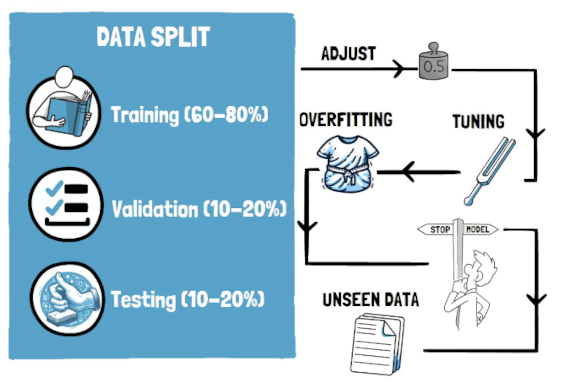

In [8]:
from torch.utils.data import random_split
train_len = int(0.8*len(train_dataset))
val_len = len(train_dataset) - train_len
train_dataset, val_dataset = random_split(train_dataset, [train_len, val_len])
len(train_dataset), len(val_dataset)

(48000, 12000)

## Preparing batches with DataLoaders

The DataLoader class in PyTorch provides a way to load data from a Dataset in batches, and it takes care of shuffling and sampling. It efficiently handles large datasets by loading them in chunks, ensuring that we don't run out of memory. Training deep learning models on entire datasets can be computationally intensive and memory-consuming. DataLoader breaks down the dataset into manageable batches, allowing the model to update its weights iteratively on smaller portions of data. It also shuffles data to ensure that the training process is not biased by data order, facilitating better model generalization.

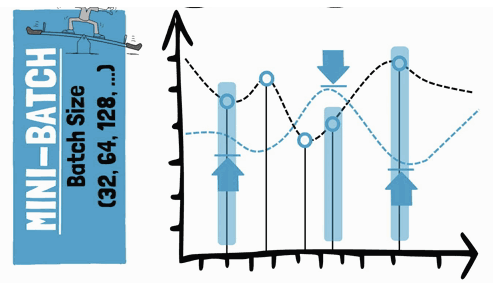

In [9]:
BATCH_SIZE = 32
train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
# Total number of batches
len(train_dl), len(val_dl)

(1500, 375)

In [11]:
# Extract a random batch
for x, y in train_dl:
  print(x.shape, y.shape)
  break

torch.Size([32, 784]) torch.Size([32, 10])


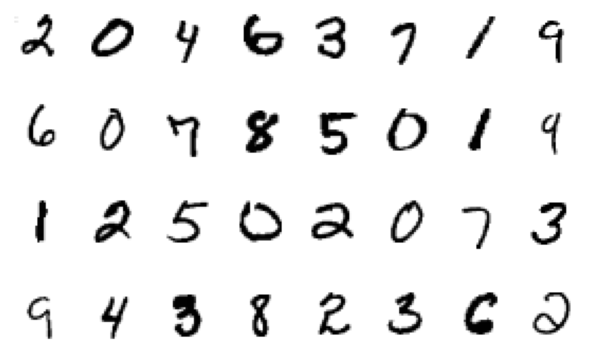

In [12]:
# Display random batch
def display_batch(x, labels= None):
  fig = plt.figure(figsize=(6, 4))
  for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(x[i].reshape(28,28), cmap='gray')
    if labels is not None:
      ax.set_title(str(labels[i]), fontsize=8)
    ax.axis('off')
  fig.tight_layout()
  plt.show()

display_batch(x)

## Training Loop (using mini batch)

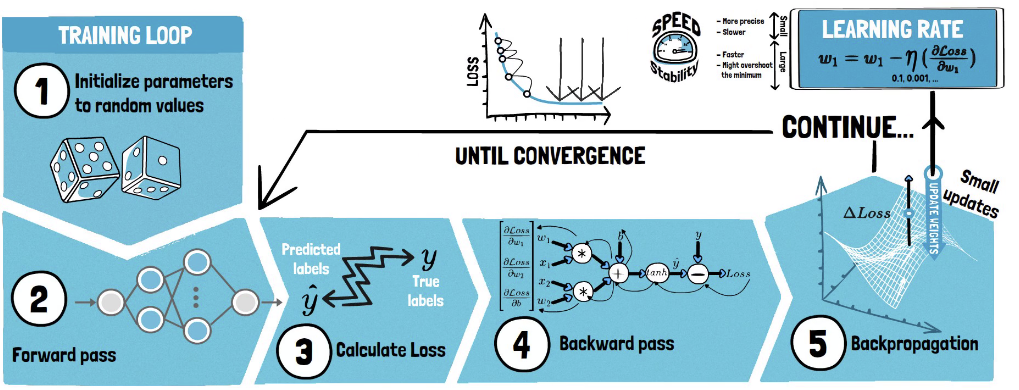

In [13]:
# set the device
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

# Step 1: Instantiate the model with random parameters
model = MNISTNet()
model.to(DEVICE)
model

MNISTNet(
  (Layer1): Linear(in_features=784, out_features=100, bias=True)
  (Layer2): Linear(in_features=100, out_features=150, bias=True)
  (Layer3): Linear(in_features=150, out_features=10, bias=True)
)

In [14]:
# Training Loop (Minimal)  --- 1: Basic way of doing
def train(model, dataloader, n_epochs, lr=0.01):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  model.to(DEVICE)
  for epoch in range(n_epochs):
    model.train()
    for i, (x, y) in enumerate(dataloader):
      x, y = x.to(DEVICE), y.to(DEVICE)
      y_hat = model(x)
      optimizer.zero_grad()
      loss = F.cross_entropy(y_hat, y)
      loss.backward()
      optimizer.step()

In [15]:
# Training Loop (Collect loss and print progress) --- 2: Better way of doing
def train(model, dataloader, n_epochs, lr=0.01):
  batch_num = len(dataloader)
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  model.to(DEVICE)
  epoch_data = []
  loss_data =  []
  for epoch in range(n_epochs):
    model.train()
    print(f"Epoch {epoch+1}/{n_epochs}")
    for i, (x, y) in enumerate(dataloader):
      x, y = x.to(DEVICE), y.to(DEVICE)
      y_hat = model(x)
      optimizer.zero_grad()
      loss = F.cross_entropy(y_hat, y)
      loss.backward()
      optimizer.step()
      epoch_data.append(epoch+i/batch_num)
      loss_data.append(loss.item())
      if i%math.ceil(batch_num/10) == 0:
        print(f"Batch {i}/{batch_num} Loss: {loss.item()}")
  return np.array(epoch_data), np.array(loss_data)

In [16]:
# Training Loop (with Validation) ----- 3: Best way of doing [dataloader goes over entire train in set of minibatch -> dataloader is repeated epoch times]
def train(model, train_dataloader, val_dataloader, n_epochs, lr=0.01):
  batch_num = len(train_dataloader)
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  model.to(DEVICE)
  epoch_data = []
  train_loss_data =  []
  val_loss_data = []
  for epoch in range(n_epochs):
    model.train()
    print(f"Epoch {epoch+1}/{n_epochs}")
    total_train_loss = 0.0
    for i, (x, y) in enumerate(train_dataloader):
      x, y = x.to(DEVICE), y.to(DEVICE)
      y_hat = model(x)
      optimizer.zero_grad()
      loss = F.cross_entropy(y_hat, y)
      loss.backward()
      optimizer.step()
      total_train_loss += loss.item()
      epoch_data.append(epoch+i/batch_num)
      train_loss_data.append(loss.item())
      if i%math.ceil(batch_num/10) == 0:
        print(f"Batch {i}/{batch_num} Loss: {loss.item()}")
    avg_train_loss = total_train_loss/len(train_dataloader)

    # Validation
    model.eval()
    total_val_loss = 0.0
    with torch.inference_mode():
      for i, (x, y) in enumerate(val_dataloader):
        x, y = x.to(DEVICE), y.to(DEVICE)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)
        total_val_loss += loss.item()
    avg_val_loss = total_val_loss/len(val_dataloader)
    val_loss_data.append(avg_val_loss)

    print(f"Average Train Loss: {avg_train_loss} Average Val Loss: {avg_val_loss}")
  return np.array(epoch_data), np.array(train_loss_data), np.array(val_loss_data)

In [17]:
N_EPOCHS = 5
epoch_data, train_loss_data, val_loss_data = train(model, train_dl, val_dl, N_EPOCHS)

Epoch 1/5
Batch 0/1500 Loss: 2.3034098148345947
Batch 150/1500 Loss: 2.208627223968506
Batch 300/1500 Loss: 2.015432834625244
Batch 450/1500 Loss: 1.2870373725891113
Batch 600/1500 Loss: 1.069746971130371
Batch 750/1500 Loss: 0.7677438259124756
Batch 900/1500 Loss: 0.9114543795585632
Batch 1050/1500 Loss: 0.632867693901062
Batch 1200/1500 Loss: 0.7844844460487366
Batch 1350/1500 Loss: 0.5548555850982666
Average Train Loss: 1.1500448705156645 Average Val Loss: 0.4957496845324834
Epoch 2/5
Batch 0/1500 Loss: 0.5027321577072144
Batch 150/1500 Loss: 0.6876868009567261
Batch 300/1500 Loss: 0.3297254741191864
Batch 450/1500 Loss: 0.4004557132720947
Batch 600/1500 Loss: 0.2108585089445114
Batch 750/1500 Loss: 0.7125131487846375
Batch 900/1500 Loss: 0.24639113247394562
Batch 1050/1500 Loss: 0.476995050907135
Batch 1200/1500 Loss: 0.2266828715801239
Batch 1350/1500 Loss: 0.3613896369934082
Average Train Loss: 0.4330923659354448 Average Val Loss: 0.4052533953686555
Epoch 3/5
Batch 0/1500 Loss: 0

## Plot loss curve

**Loss curve**

A loss curve is a graphical representation that shows how the loss (or error) of a model changes over time (or iterations). It provides insights into the following:

* **Convergence**: If the loss is decreasing and eventually stabilizes, it suggests the model is learning and converging to a solution.

* **Overfitting**: If the training loss continues to decrease but a validation/test loss starts to increase, it's an indicator of overfitting. This means the model is performing well on the training data but not generalizing well to unseen data.

* **Need for Hyperparameter Tuning**: If the loss is fluctuating significantly or not decreasing, it may indicate the need for changes in learning rate, model architecture, or other hyperparameters.

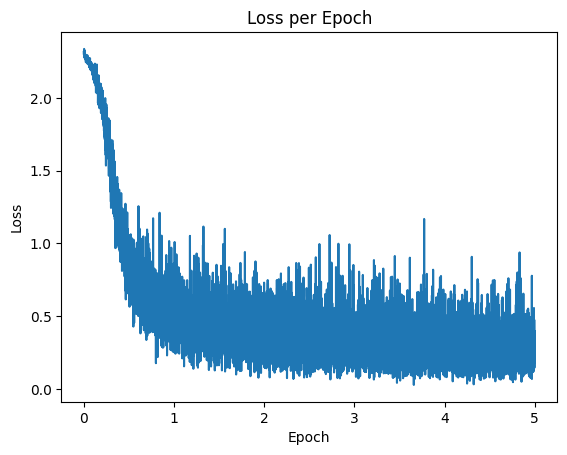

In [23]:
# Loss per batch
import numpy as np

def plot_loss_per_batch(epoch_data, loss_data):
  plt.plot(epoch_data, loss_data)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Loss per Epoch")
  plt.show()

plot_loss_per_batch(epoch_data, train_loss_data)

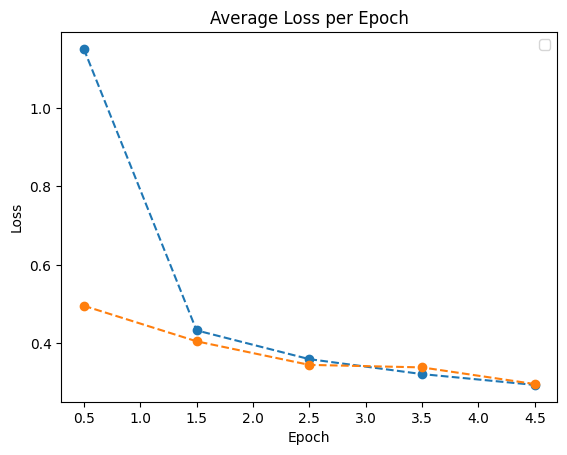

In [24]:
# Average loss per epoch
def plot_avg_loss_per_epoch(epoch_data, train_loss_data, val_loss_data, n_epochs):
  losses_data_avgd = train_loss_data.reshape(n_epochs, -1).mean(axis=1) # Reshaping as (n_epochs, losses) so each column has all the losses in that epoch and then average each col to get each epoch avg loss
  epoch_data_avgd = epoch_data.reshape(n_epochs, -1).mean(axis=1) # Same reshaping for epoch data i.e. epoch + (i/batchnum)
  plt.plot(epoch_data_avgd, losses_data_avgd, 'o--')
  plt.plot(epoch_data_avgd, val_loss_data, 'o--')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Average Loss per Epoch")
  plt.legend()
  plt.show()

plot_avg_loss_per_epoch(epoch_data, train_loss_data, val_loss_data, N_EPOCHS)

## Saving and using the model


In [25]:
# save_dict lets you save model in pytorch
torch.save(model.state_dict(), "model_state_dict.pt")

# Load the model
model1 = MNISTNet()
model1.load_state_dict(torch.load("model_state_dict.pt"))
model1

<ipython-input-25-a8f674ded7a8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load("model_state_dict.pt"))


MNISTNet(
  (Layer1): Linear(in_features=784, out_features=100, bias=True)
  (Layer2): Linear(in_features=100, out_features=150, bias=True)
  (Layer3): Linear(in_features=150, out_features=10, bias=True)
)

In [26]:
# Inference on unseen image
image_path = 'mnist/testing/0/10.png'
image = Image.open(image_path)
image

In [27]:
def recognize_digit(model, image):
  model.eval()
  x = transform(image).squeeze(0).reshape(28*28)
  with torch.inference_mode():
    label = model(x.unsqueeze(0)).argmax(dim=1).item()
  return label

In [28]:
recognize_digit(model1, image)

0

In [29]:
image_path = 'mnist/testing/7/6944.png'
image = Image.open(image_path)
recognize_digit(model1, image)

7

## Full Batch and Incremental Updates

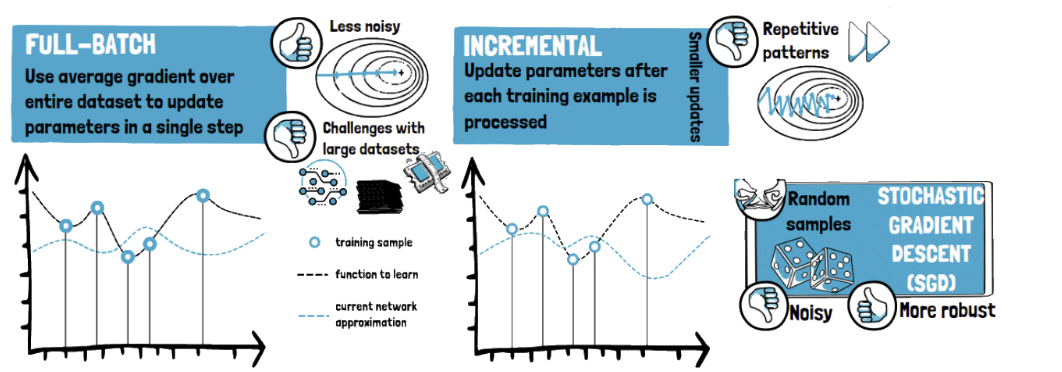

In [30]:
# Incremental Update
BATCH_SIZE = 1
train_incremental_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
len(train_incremental_dl)

48000

In [31]:
model2 = MNISTNet().to(DEVICE)
epoch_data, train_loss_data, val_loss_data = train(model2, train_incremental_dl, val_dl, n_epochs=N_EPOCHS)

Epoch 1/5
Batch 0/48000 Loss: 2.2650418281555176
Batch 4800/48000 Loss: 1.5886270999908447
Batch 9600/48000 Loss: 1.4830089807510376
Batch 14400/48000 Loss: 0.22049511969089508
Batch 19200/48000 Loss: 1.0741157531738281
Batch 24000/48000 Loss: 0.006279855500906706
Batch 28800/48000 Loss: 0.0005840741214342415
Batch 33600/48000 Loss: 0.017432445660233498
Batch 38400/48000 Loss: 0.081145279109478
Batch 43200/48000 Loss: 0.003502902342006564
Average Train Loss: 0.6101806278991085 Average Val Loss: 0.3146246457795302
Epoch 2/5
Batch 0/48000 Loss: 0.005678711924701929
Batch 4800/48000 Loss: 0.025132114067673683
Batch 9600/48000 Loss: 0.0017028844449669123
Batch 14400/48000 Loss: 7.462222856702283e-05
Batch 19200/48000 Loss: 1.676422357559204
Batch 24000/48000 Loss: 0.33377283811569214
Batch 28800/48000 Loss: 0.026453938335180283
Batch 33600/48000 Loss: 0.0009355935617350042
Batch 38400/48000 Loss: 0.04355313256382942
Batch 43200/48000 Loss: 1.7364236116409302
Average Train Loss: 0.378263019

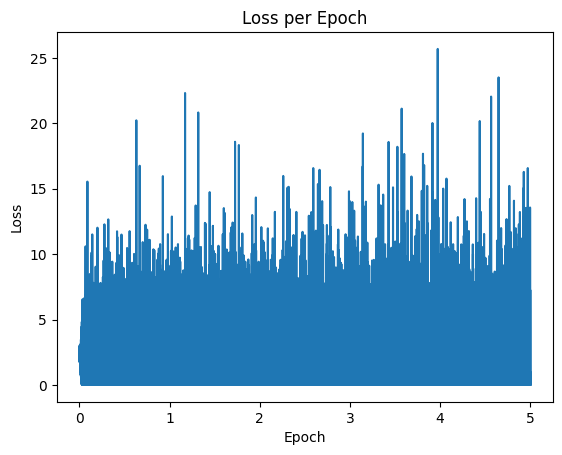

In [32]:
plot_loss_per_batch(epoch_data, train_loss_data)

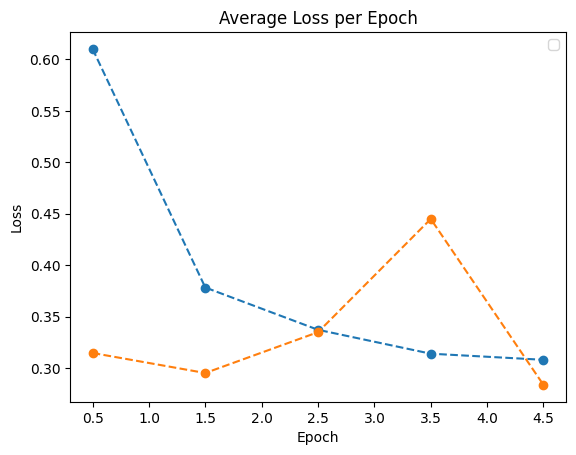

In [33]:
plot_avg_loss_per_epoch(epoch_data, train_loss_data, val_loss_data, n_epochs=N_EPOCHS)

## Evaluation

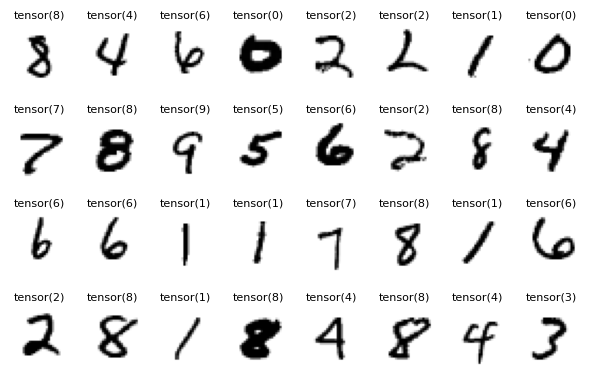

In [34]:
test_dl = DataLoader(MNISTDataset(root_dir="mnist/testing/"), batch_size=32, shuffle=True)
i=1
for x,y in test_dl:
  x = x.to(DEVICE)
  y = model(x)
  display_batch(x, labels=y.argmax(dim=1))
  break

## Accuracy

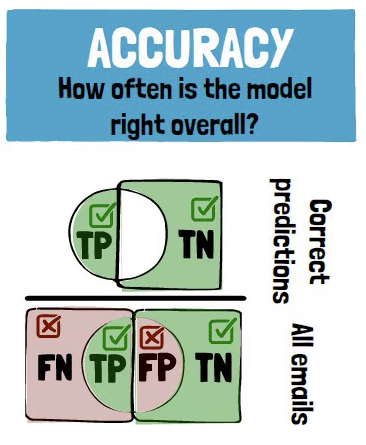

In [35]:
def calculate_accuracy(model, dataloader):
  model.to(DEVICE)
  model.eval()
  correct = 0
  total = 0
  with torch.inference_mode():
    for x,y in dataloader:
      x, y = x.to(DEVICE), y.to(DEVICE)
      y_hat = model(x)
      predicted_classes = y_hat.argmax(dim=1)
      total += y.size(0)
      correct += (predicted_classes == y.argmax(1)).sum().item()
  accuracy = 100*correct/total
  return round(accuracy, 2)

In [36]:
print(f"Batch Trained Model Test Accuracy: {calculate_accuracy(model, test_dl)}")
print(f"Batch Trained Model Train Accuracy: {calculate_accuracy(model, train_dl)}")
print(f"Increamental Trained Model Test Accuracy: {calculate_accuracy(model, test_dl)}")

Batch Trained Model Test Accuracy: 91.71
Batch Trained Model Train Accuracy: 91.42
Increamental Trained Model Test Accuracy: 91.71


## Confusion Matrix

A confusion matrix is a table used in classification to understand the performance of a machine learning model. Each row of the matrix represents the actual class, while each column represents the predicted class. The main diagonal represents correct predictions, while other entries outside this diagonal indicate errors. Key metrics such as accuracy, precision, and recall can be derived from the confusion matrix to provide insights into the classifier's performance.

In [37]:
import seaborn as sns

def confusion_matrix(model, dataloader):
  num_classes = 10
  confusion_matrix = torch.zeros(num_classes, num_classes)
  model.to(DEVICE)
  with torch.inference_mode():
    for x,y in dataloader:
      x, y = x.to(DEVICE), y.to(DEVICE)
      y_hat = model(x)
      _,preds = torch.max(y_hat, 1)
      _,true_classes = torch.max(y, 1)
      for t,p in zip(true_classes.view(-1), preds.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1
  return confusion_matrix

def plot_confusion_matrix(matrix):
  plt.figure(figsize=(10,7))
  sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

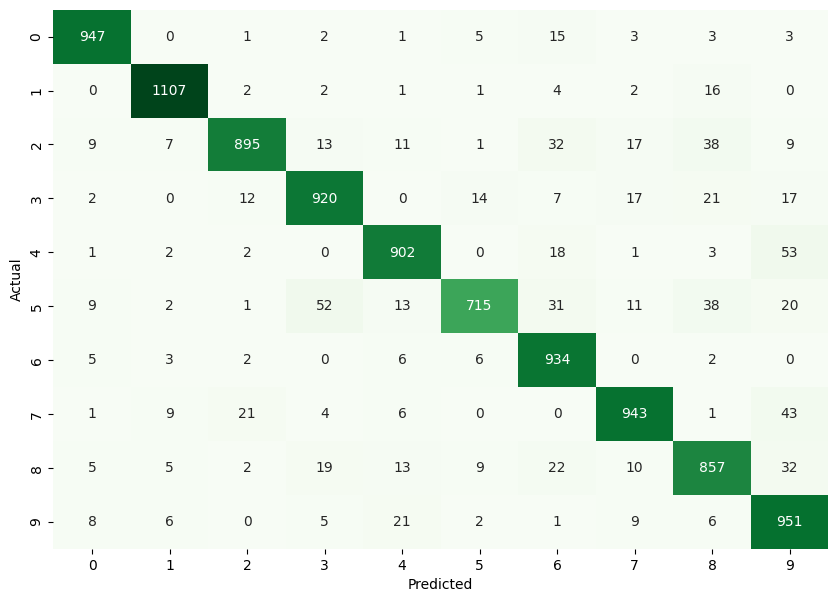

In [38]:
matrix = confusion_matrix(model, test_dl)
plot_confusion_matrix(matrix)

## Predicted and Recall for Multiclass Classification

For multi-class classification, things are a bit more complex. You have to treat each class as if it's the positive class, and all other classes as the negative class. This is called the **one-vs-all** approach.

- **Precision for Class X**: Number of correct predictions of class X divided by the total number of times you predicted X.

- **Recall for Class X**: Number of correct predictions of class X divided by the total number of actual occurrences of X in the dataset.

We'll use the confusion matrix to compute precision and recall for each class in the MNIST dataset.

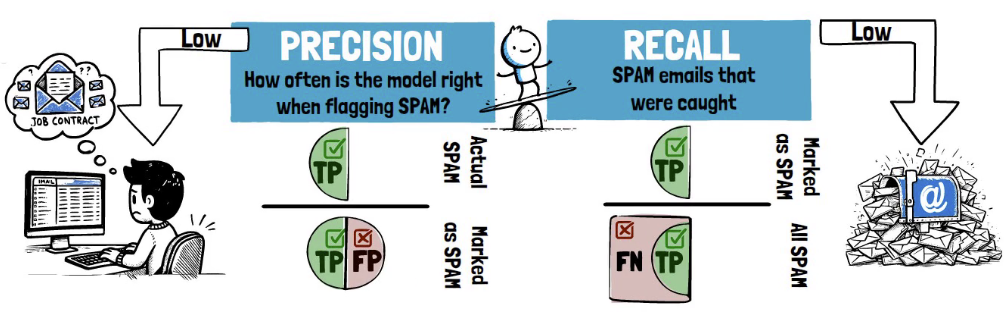

In [41]:
def precision_recall_from_confusion_matrix(matrix):
  precision = {}
  recall = {}
  for i in range(matrix.shape[0]):
    tp = matrix[i,i]
    fp = matrix[:,i].sum() - tp
    fn = matrix[i,:].sum() - tp
    tn = matrix.sum() - tp - fp - fn
    precision[i] = tp/(tp+fp)
    recall[i] = tp/(tp+fn)
  return precision, recall
precision, recall = precision_recall_from_confusion_matrix(matrix)

for i in range(10):
  print(f"Class: {i}, Precision: {precision[i]}, Recall: {recall[i]}")

Class: 0, Precision: 0.9594731330871582, Recall: 0.9663265347480774
Class: 1, Precision: 0.9702015519142151, Recall: 0.9753304123878479
Class: 2, Precision: 0.9541577696800232, Recall: 0.8672480583190918
Class: 3, Precision: 0.904621422290802, Recall: 0.9108911156654358
Class: 4, Precision: 0.9260780215263367, Recall: 0.9185336232185364
Class: 5, Precision: 0.9495351910591125, Recall: 0.8015695214271545
Class: 6, Precision: 0.8778195381164551, Recall: 0.9749478101730347
Class: 7, Precision: 0.9308983087539673, Recall: 0.9173151850700378
Class: 8, Precision: 0.8700507879257202, Recall: 0.8798767924308777
Class: 9, Precision: 0.8430851101875305, Recall: 0.9425173401832581
